# Data Preprocessing

## Importing Libraries

```python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


## Loading Dataset and getting info about the dataset

In [2]:
df = pd.read_csv('spotify.csv')
display(df.head())
print(df.shape)
print(df.info())

,Track ID,Track Name,Artist,Album,Duration (ms),Popularity,Genre
0,5GorCbAP4aL0EJ16frG2hd,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,262333,71,"punk, pop punk"
1,3z8h0TU7ReDPLIbEnYhWZb,Bohemian Rhapsody,Queen,Bohemian Rhapsody (The Original Soundtrack),354947,72,"classic rock, rock, glam rock"
2,2JzZzZUQj3Qff7wapcbKjc,See You Again (feat. Charlie Puth),"Wiz Khalifa, Charlie Puth",See You Again (feat. Charlie Puth),229525,80,rap
3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,Dreamland,238805,84,NaN
4,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,Masked Wolf,Astronaut In The Ocean,132780,70,NaN


(248, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Track ID       248 non-null    object
 1   Track Name     248 non-null    object
 2   Artist         248 non-null    object
 3   Album          248 non-null    object
 4   Duration (ms)  248 non-null    int64 
 5   Popularity     248 non-null    int64 
 6   Genre          131 non-null    object
dtypes: int64(2), object(5)
memory usage: 13.7+ KB
None


## Detecting missing values and handling them

In [3]:
print("\nMissing Values:")
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100) # percentage of missing values


Missing Values:
Track ID           0
Track Name         0
Artist             0
Album              0
Duration (ms)      0
Popularity         0
Genre            117
dtype: int64
Track ID          0.000000
Track Name        0.000000
Artist            0.000000
Album             0.000000
Duration (ms)     0.000000
Popularity        0.000000
Genre            47.177419
dtype: float64


In [4]:
df['Genre'].fillna('Unknown', inplace=True) 

C:\Users\BHAVYASHA\AppData\Local\Temp\ipykernel_10296\2967490279.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].fillna('Unknown', inplace=True)


In [5]:
df.head()

,Track ID,Track Name,Artist,Album,Duration (ms),Popularity,Genre
0,5GorCbAP4aL0EJ16frG2hd,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,262333,71,"punk, pop punk"
1,3z8h0TU7ReDPLIbEnYhWZb,Bohemian Rhapsody,Queen,Bohemian Rhapsody (The Original Soundtrack),354947,72,"classic rock, rock, glam rock"
2,2JzZzZUQj3Qff7wapcbKjc,See You Again (feat. Charlie Puth),"Wiz Khalifa, Charlie Puth",See You Again (feat. Charlie Puth),229525,80,rap
3,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Glass Animals,Dreamland,238805,84,Unknown
4,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,Masked Wolf,Astronaut In The Ocean,132780,70,Unknown


## categorical Exploration

In [6]:
print("\nUnique Values and Frequencies (Categorical):")
categorical_cols = ['Track ID', 'Track Name', 'Artist', 'Album', 'Genre']
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Most frequent values: \n{df[col].value_counts().head(5)}")


Unique Values and Frequencies (Categorical):

Column: Track ID
Number of unique values: 248
Most frequent values: 
Track ID
5GorCbAP4aL0EJ16frG2hd    1
3z8h0TU7ReDPLIbEnYhWZb    1
2JzZzZUQj3Qff7wapcbKjc    1
3USxtqRwSYz57Ewm6wWRMp    1
3Ofmpyhv5UAQ70mENzB277    1
Name: count, dtype: int64

Column: Track Name
Number of unique values: 248
Most frequent values: 
Track Name
Boulevard of Broken Dreams            1
Bohemian Rhapsody                     1
See You Again (feat. Charlie Puth)    1
Heat Waves                            1
Astronaut In The Ocean                1
Name: count, dtype: int64

Column: Artist
Number of unique values: 214
Most frequent values: 
Artist
Imagine Dragons         5
Arijit Singh            5
Pritam, Arijit Singh    5
The Weeknd              4
NEFFEX                  3
Name: count, dtype: int64

Column: Album
Number of unique values: 237
Most frequent values: 
Album
Different World         3
Starboy                 2
Evolve                  2
7                 

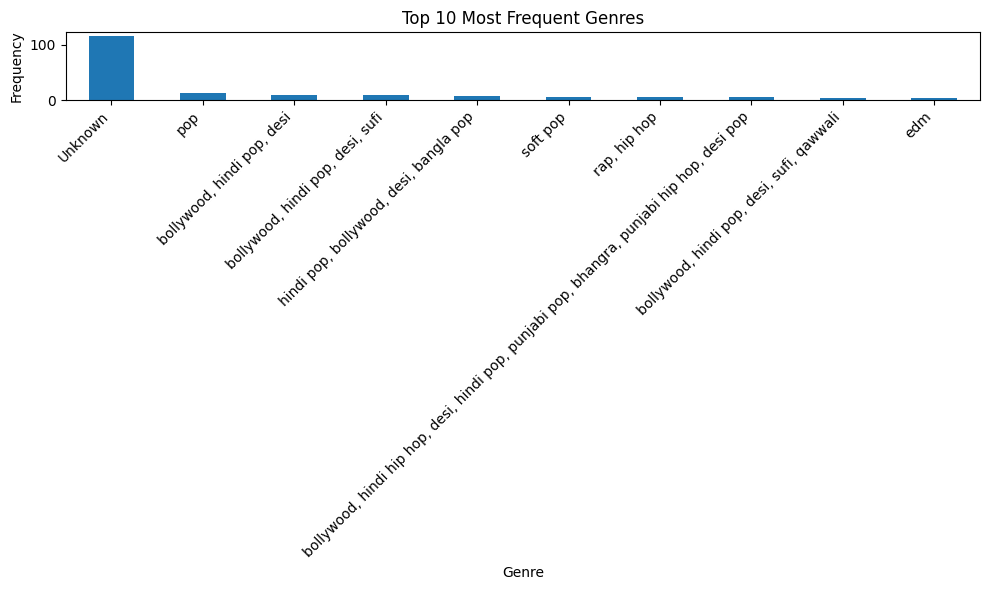

In [7]:
# Visualize categorical features (example for 'Genre' due to space)
plt.figure(figsize=(10, 6))
df['Genre'].value_counts().head(10).plot(kind='bar')  # Limit to top 10 for readability
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Duplicate Values detection

In [11]:
duplicate_rows = df.duplicated()
print("\nNumber of duplicate rows:", duplicate_rows.sum())


Number of duplicate rows: 0


In [12]:
df.drop_duplicates(inplace=True)

## Handling Outliers